In [1]:
import nltk.corpus
from collections import Counter
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\YOGENDER
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
#/*Question 1*\\

In [3]:
brown = nltk.corpus.brown

word_count = dict(sorted(Counter(brown.words()).items(), key=lambda item: item[1], reverse=True))
unique_words = list(word_count.keys())

print("Size of word tokens, ", word_count["tokens"])

print("Size of word types, ", word_count["types"])

print("Size of category government, ", len(brown.tagged_paras(categories='government')))

[print(f"No. {i+1} most frequent word, {unique_words[i]}") for i in range(10)]

print("Number of sentences, ",len(brown.sents()))

Size of word tokens,  2
Size of word types,  114
Size of category government,  851
No. 1 most frequent word, the
No. 2 most frequent word, ,
No. 3 most frequent word, .
No. 4 most frequent word, of
No. 5 most frequent word, and
No. 6 most frequent word, to
No. 7 most frequent word, a
No. 8 most frequent word, in
No. 9 most frequent word, that
No. 10 most frequent word, is
Number of sentences,  57340


In [6]:
#Question 2*\
explore the nltk package

In [7]:
from nltk.corpus import inaugural
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to C:\Users\YOGENDER
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

  -->Inaugural Address Corpus
The graph in fig-inaugural used "word offset" as one of the axes; this is the numerical index of the word in the corpus, counting from the first word of the first address. However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

In [ ]:
inaugural.fileids()
[fileid[:4] for fileid in inaugural.fileids()]

Notice that the year of each text appears in its filename. To get the year out of the filename, we extracted the first four characters, using fileid[:4].

In [8]:
print(inaugural.words())



['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]


Let's look at how the words America and citizen are used over time. The following code converts the words in the Inaugural corpus to lowercase using w.lower(), then checks if they start with either of the "targets" america or citizen using startswith(). Thus it will count words like American's and Citizens. We'll learn about conditional frequency distributions in 2; for now just consider the output.


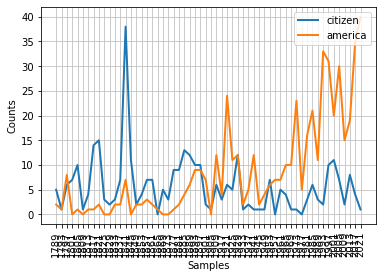

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid) for target in ['america', 'citizen'] if w.lower().startswith(target))
cfd.plot()

**Working with file contents**


##*We can identify and subset lists of files, but at some point we want to work with the text itself. The way that nltk does this is specific to the package, and so not suitable for the general SWC lesson, but we can use what we learned in SWC to carry out common tasks.*

#It is common in nltk to import a corpus directly - this helps reduce typing. For the Gutenberg corpus, this would be:

In [10]:
from nltk.corpus import gutenberg


In [11]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


*Each corpus also provides functions, again accessed by dotted notation, which can be used, for example to get data from or analyse each text.

So, to get all the words in Jane Austen's Emma, we can use the gutenberg.words() function:

In [12]:
gutenberg.words('austen-emma.txt')


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

This looks like a list, but isn't. We can use the type() function that we met in the SWC lesson to see what datatype it is:

In [13]:
emma_words = gutenberg.words('austen-emma.txt')
type(emma_words)

nltk.corpus.reader.util.StreamBackedCorpusView

This is a datatype that is specific to nltk (and so not in the scope of SWC), but we can do many of the things we would for lists, as in the cell below:

In [14]:
# How many tokens in the text:
print("Token count:", len(emma_words))

# What is the token at index 1000?
print("token at index 1000:", emma_words[1000])

# Slice from token 1400 to 1500
print("slice from 1400 to 1500:", emma_words[1400:1500])

Token count: 192427
token at index 1000: did
slice from 1400 to 1500: ['a', 'house', 'of', 'her', 'own', '?', 'This', 'is', 'three', 'times', 'as', 'large', '.--', 'And', 'you', 'have', 'never', 'any', 'odd', 'humours', ',', 'my', 'dear', '."', '"', 'How', 'often', 'we', 'shall', 'be', 'going', 'to', 'see', 'them', ',', 'and', 'they', 'coming', 'to', 'see', 'us', '!--', 'We', 'shall', 'be', 'always', 'meeting', '!', '_We_', 'must', 'begin', ';', 'we', 'must', 'go', 'and', 'pay', 'wedding', 'visit', 'very', 'soon', '."', '"', 'My', 'dear', ',', 'how', 'am', 'I', 'to', 'get', 'so', 'far', '?', 'Randalls', 'is', 'such', 'a', 'distance', '.', 'I', 'could', 'not', 'walk', 'half', 'so', 'far', '."', '"', 'No', ',', 'papa', ',', 'nobody', 'thought', 'of', 'your', 'walking', '.', 'We']


***Visualisation***


We can plot statistics relating to the text, using matplotlib and seaborn, as we did in the SWC lesson.

Firstly, we'll take the length of all tokens in the text and put that information in a list called token_len (and print the first few values):

In [15]:
token_len = []
for token in emma_words:
    token_len.append(len(token))
print("token_len:", token_len[:20])

token_len: [1, 4, 2, 4, 6, 4, 1, 6, 1, 7, 1, 4, 9, 1, 8, 1, 6, 1, 3, 4]


Next, we'll import modules for visualisation:

In [20]:
%matplotlib inline

import matplotlib.pyplot
import seaborn as plt

Now we can plot summary statistics of the data - such as a distribution plot, to see what the most common token length is:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

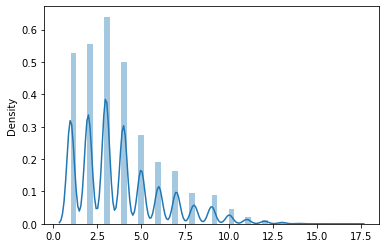

In [21]:
seaborn.distplot(token_len)


By using for loops, we can make comparisons over all texts in a corpus - here, text length:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

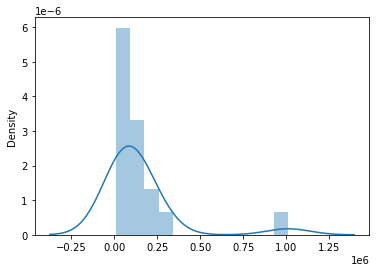

In [22]:
text_len = []
for text in gutenberg.fileids():
    text_len.append(len(gutenberg.words(text)))
seaborn.distplot(text_len)
seaborn.plt.xlim(0, 1e6)              # set x-axis limits

In [23]:
targets = ['man', 'woman']
filtered = []
for text in gutenberg.fileids():
    words = gutenberg.words(text)
    for word in words:
        word_lc = word.lower()              # word.lower() converts the word to lower case
        if word_lc in targets:
            filtered.append((word_lc, text))

In [24]:
print(filtered[:20])


[('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('man', 'austen-emma.txt'), ('woman', 'austen-emma.txt'), ('man', 'austen-emma.txt')]


In [25]:
data = nltk.ConditionalFreqDist(filtered)
print(data)

<ConditionalFreqDist with 2 conditions>


In [26]:
# Get frequency count of a word
data['woman']

FreqDist({'bible-kjv.txt': 364, 'austen-emma.txt': 131, 'edgeworth-parents.txt': 104, 'whitman-leaves.txt': 95, 'austen-sense.txt': 68, 'austen-persuasion.txt': 67, 'chesterton-brown.txt': 30, 'bryant-stories.txt': 26, 'chesterton-ball.txt': 19, 'milton-paradise.txt': 19, ...})

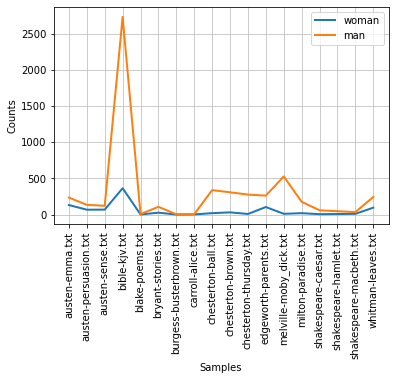

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# Plot conditional frequency data
data.plot()